In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

# import helper functions
from functions.add_cyclic_point_to_dataset import add_cyclic_point_to_dataset
from functions.plottingFunctions import *

In [2]:
# function to add proxy records to map
def addProxyRecord(lon, lat, markerColor):
    plt.plot(lon,lat, marker='o', fillstyle='full', markeredgecolor = 'k', linestyle ='none',
                color = markerColor, markersize = 4, transform = ccrs.PlateCarree())

In [3]:
# load proxy database
proxyFile = '/Users/alawman2023/Library/CloudStorage/OneDrive-TheColoradoCollege/Projects_Manuscripts/DiNezio2024_HS1_Synthesis_Zenodo/Version v4/DiNezio_etal_HS1_database_2025.xlsx'

# proxy databse excluding the d18Osw records
db = pd.read_excel(proxyFile, sheet_name='selected_records')

# d18Osw records
db_sw = pd.read_excel(proxyFile, sheet_name='selected_d18Osw_not_used')

# skip first empty line
db = db[1:]
db_sw = db_sw[1:]

# combine all the proxy records (including d18Osw) into single arrays
proxyNum = np.append(db['Number'], db_sw['Number'])
proxyLat = np.append(db['Lat (°N)'], db_sw['Lat (°N)'])
proxyLon = np.append(db['Lon (°E)'], db_sw['Lon (°E)'])
HS1_interp = np.append(db['H1 change'], db_sw['H1 change'])

# number of proxy records
numRecords = len(HS1_interp)

In [4]:
# list of the model simulation names
mdlFile = '/Users/alawman2023/Documents/Data/Hosing/Regridded_model_names_18models.txt'
mdlNames = pd.read_csv(mdlFile, header=None)
print(mdlNames)

# load multi-model ensemble (annual mean precipitation)
mdlData = '/Users/alawman2023/Documents/Data/Hosing/Regridded_precip_18models.nc'
ds = xr.open_dataset(mdlData)
lon = ds['lon']

# number of simulations
numSimulations = len(ds['model'])

# add cyclic point to dataset for plotting
new_ds = add_cyclic_point_to_dataset(ds, 'hose')
hose = new_ds['hose']

new_ds = add_cyclic_point_to_dataset(ds, 'control')
ctrl = new_ds['control']

# percent change in rainfall
pctChg = (hose / ctrl)*100

                     0
0         HadCM3-0.4Sv
1         CCSM3-1Sv-NA
2          CESM1-0.2Sv
3   CCSM3-0.2Sv-GIN-LR
4             IPSL-CM4
5      CCSM3-TraCE-MWF
6     CESM1-iTraCE-MWF
7             IPSL-CM5
8   CCSM3-0.2Sv-GIN-HR
9         CESM1-0.15Sv
10      CCSM4-0.1Sv-RB
11            COSMOS-W
12            COSMOS-S
13      CCSM3-0.1Sv-NA
14             MIROC-W
15        HadCM3-0.1Sv
16         CESM1-0.1Sv
17             MIROC-S


In [5]:
'''
# plot hosing minus LGM changes for each simulation
# selected color map from cmocean colormaps for oceanography


# NumPy array for the color bar levels
lev = np.arange(-2.2,2.4,0.2);
#lev = np.arange(0, 14, 1);

label = "Precipitation change (mm/day)"

for i in np.arange(0,numSimulations): #numSimulations
    tmp = hose[i]
    
    # generate global map
    ax = plotWorldMap(tmp, cmap, lev, label)
    
    # add title
    ax.set_title(mdlNames[0][i])
'''

'\n# plot hosing minus LGM changes for each simulation\n# selected color map from cmocean colormaps for oceanography\n\n\n# NumPy array for the color bar levels\nlev = np.arange(-2.2,2.4,0.2);\n#lev = np.arange(0, 14, 1);\n\nlabel = "Precipitation change (mm/day)"\n\nfor i in np.arange(0,numSimulations): #numSimulations\n    tmp = hose[i]\n\n    # generate global map\n    ax = plotWorldMap(tmp, cmap, lev, label)\n\n    # add title\n    ax.set_title(mdlNames[0][i])\n'

In [6]:
# indices for the simulations with the highest global kappa values
# CCSM3-TraCE-MWF, CCSM3-0.2Sv-GIN-LR, IPSL-CM5, IPSL-CM4, CCSM4-0.1Sv-RB (QSR submission January 2025)
# bestIdx = [5, 3, 6, 4, 9]

# CCSM3-TraCE-MWF, CCSM3-0.2Sv-GIN-LR, CESM1-iTraCE-MWF, IPSL-CM5, IPSL-CM4, CCSM4-0.1Sv-RB (QSR revision July 2025)
bestIdx = [5, 3, 6, 7, 4]
mdlNames[0][bestIdx]

5       CCSM3-TraCE-MWF
3    CCSM3-0.2Sv-GIN-LR
6      CESM1-iTraCE-MWF
7              IPSL-CM5
4              IPSL-CM4
Name: 0, dtype: object

Text(0.5, 1.0, 'Ensemble mean hosing: highest global kappa')

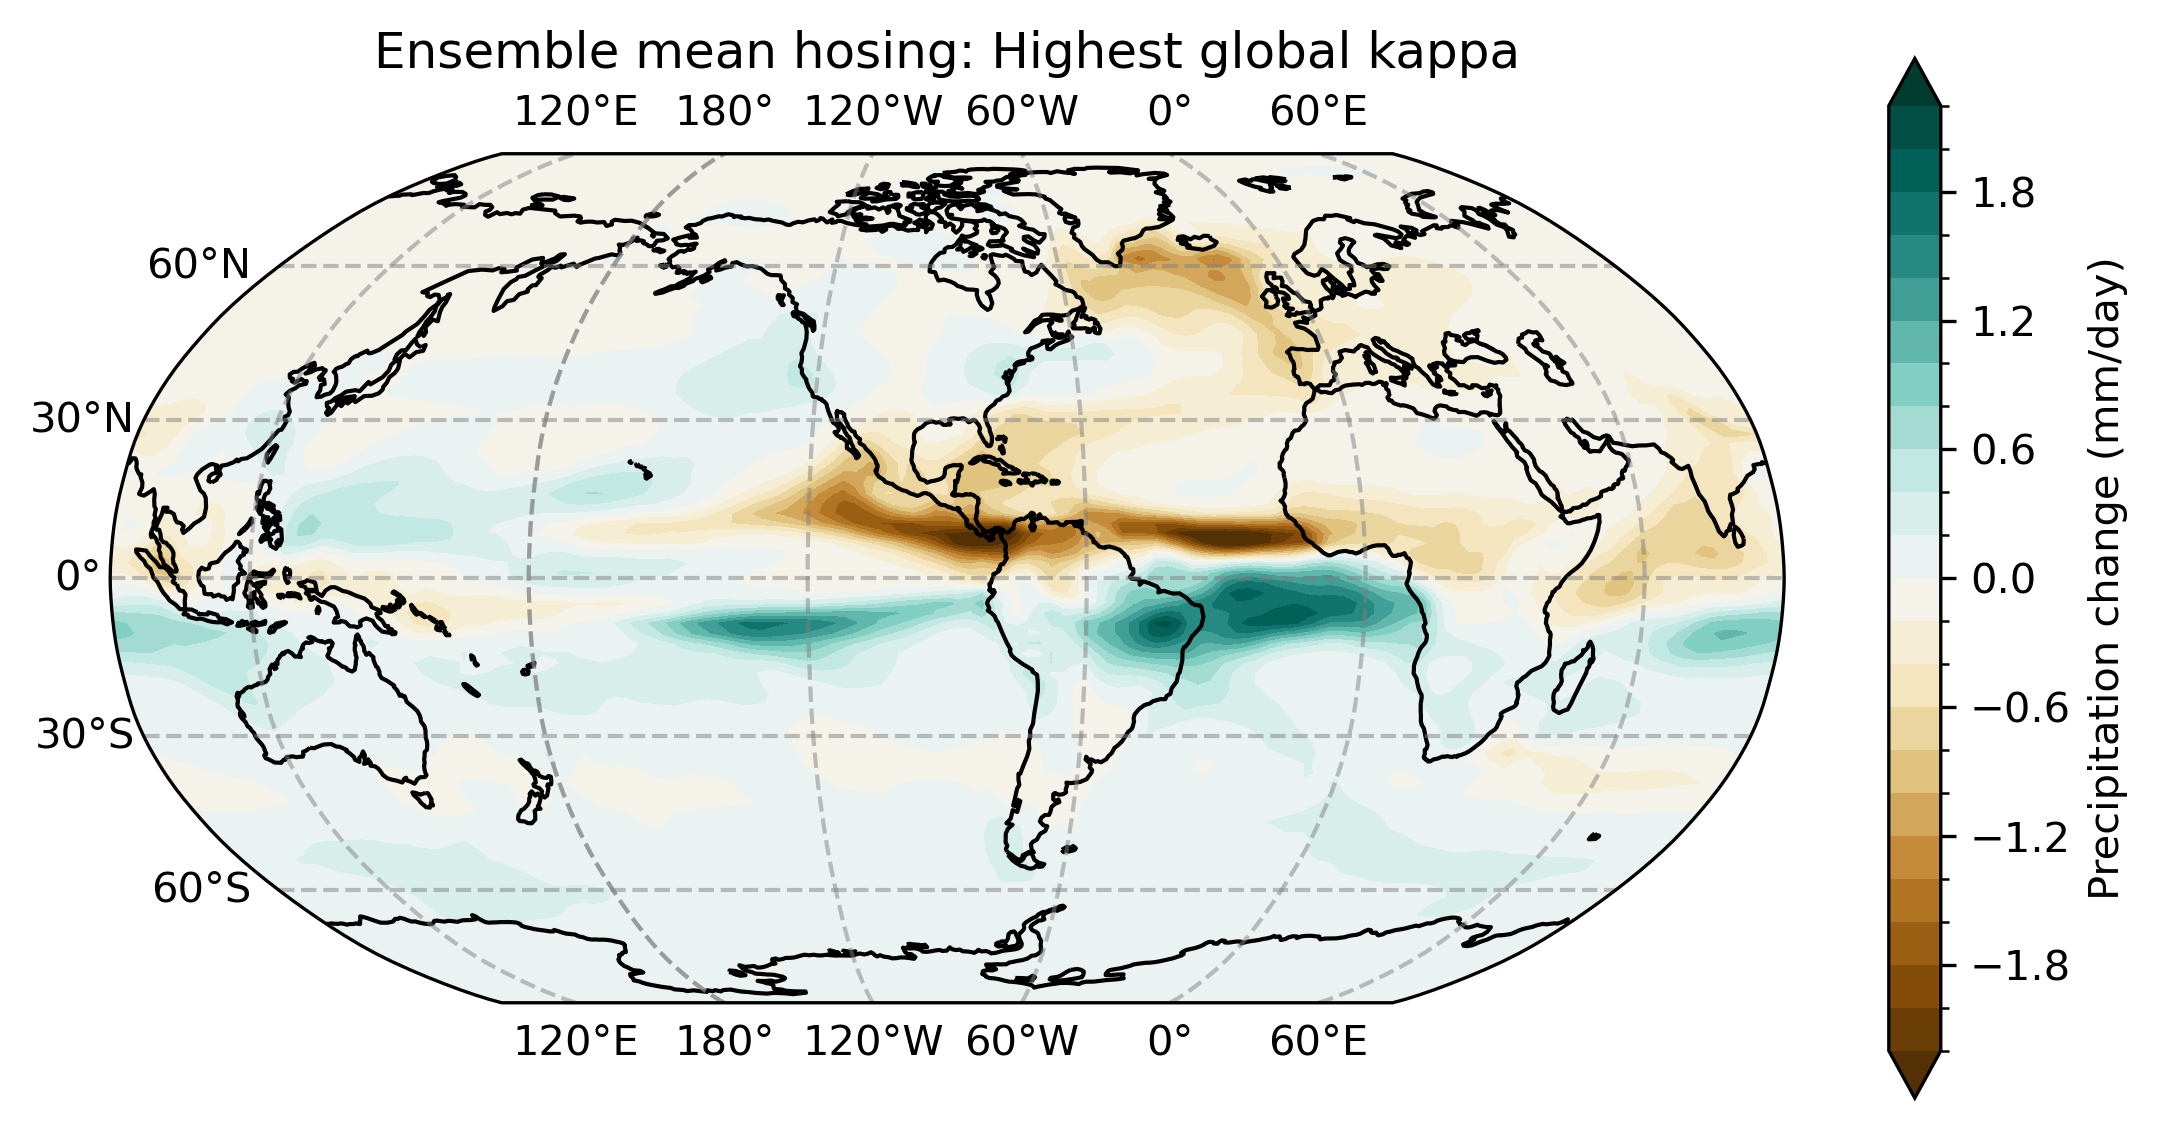

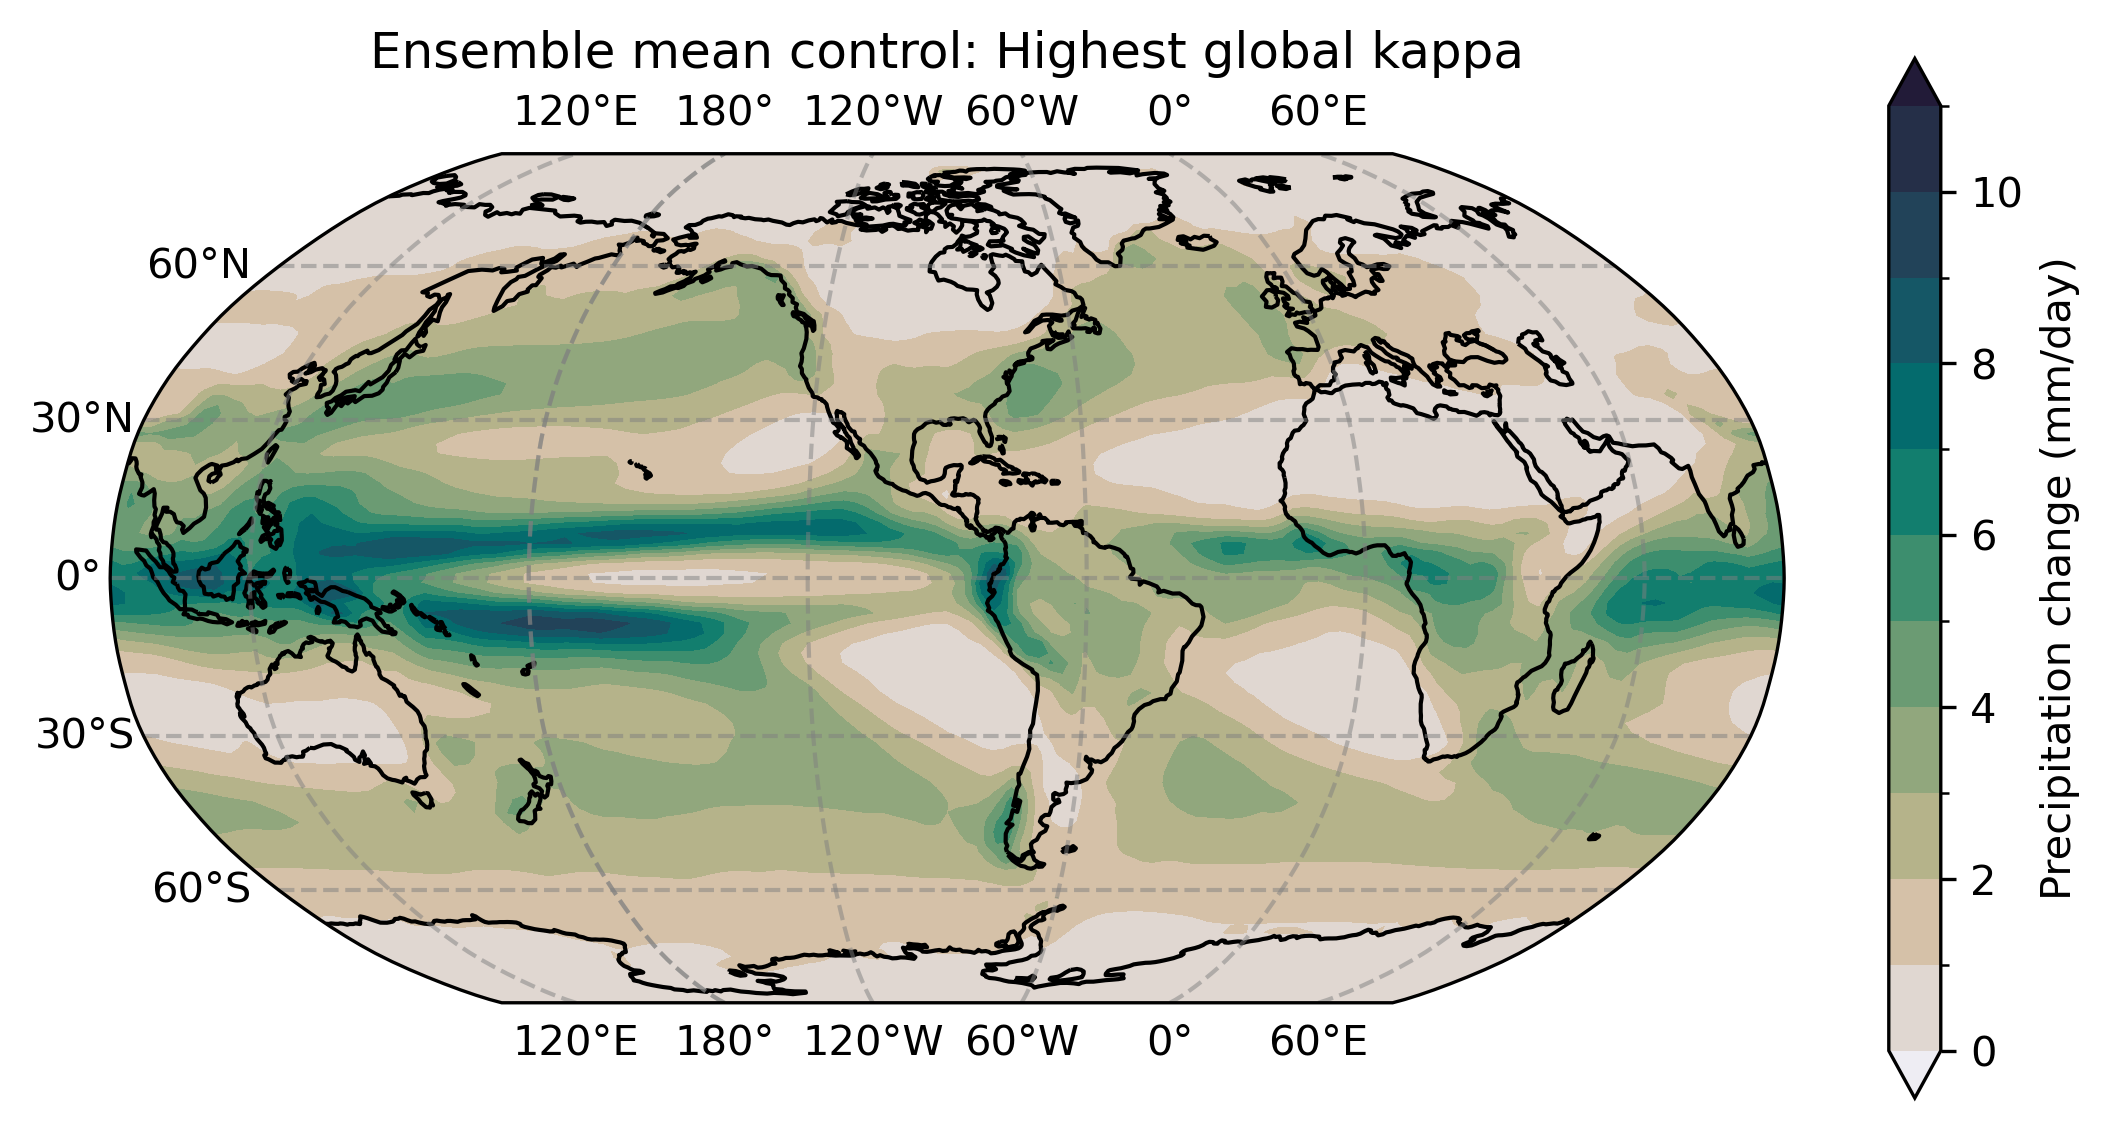

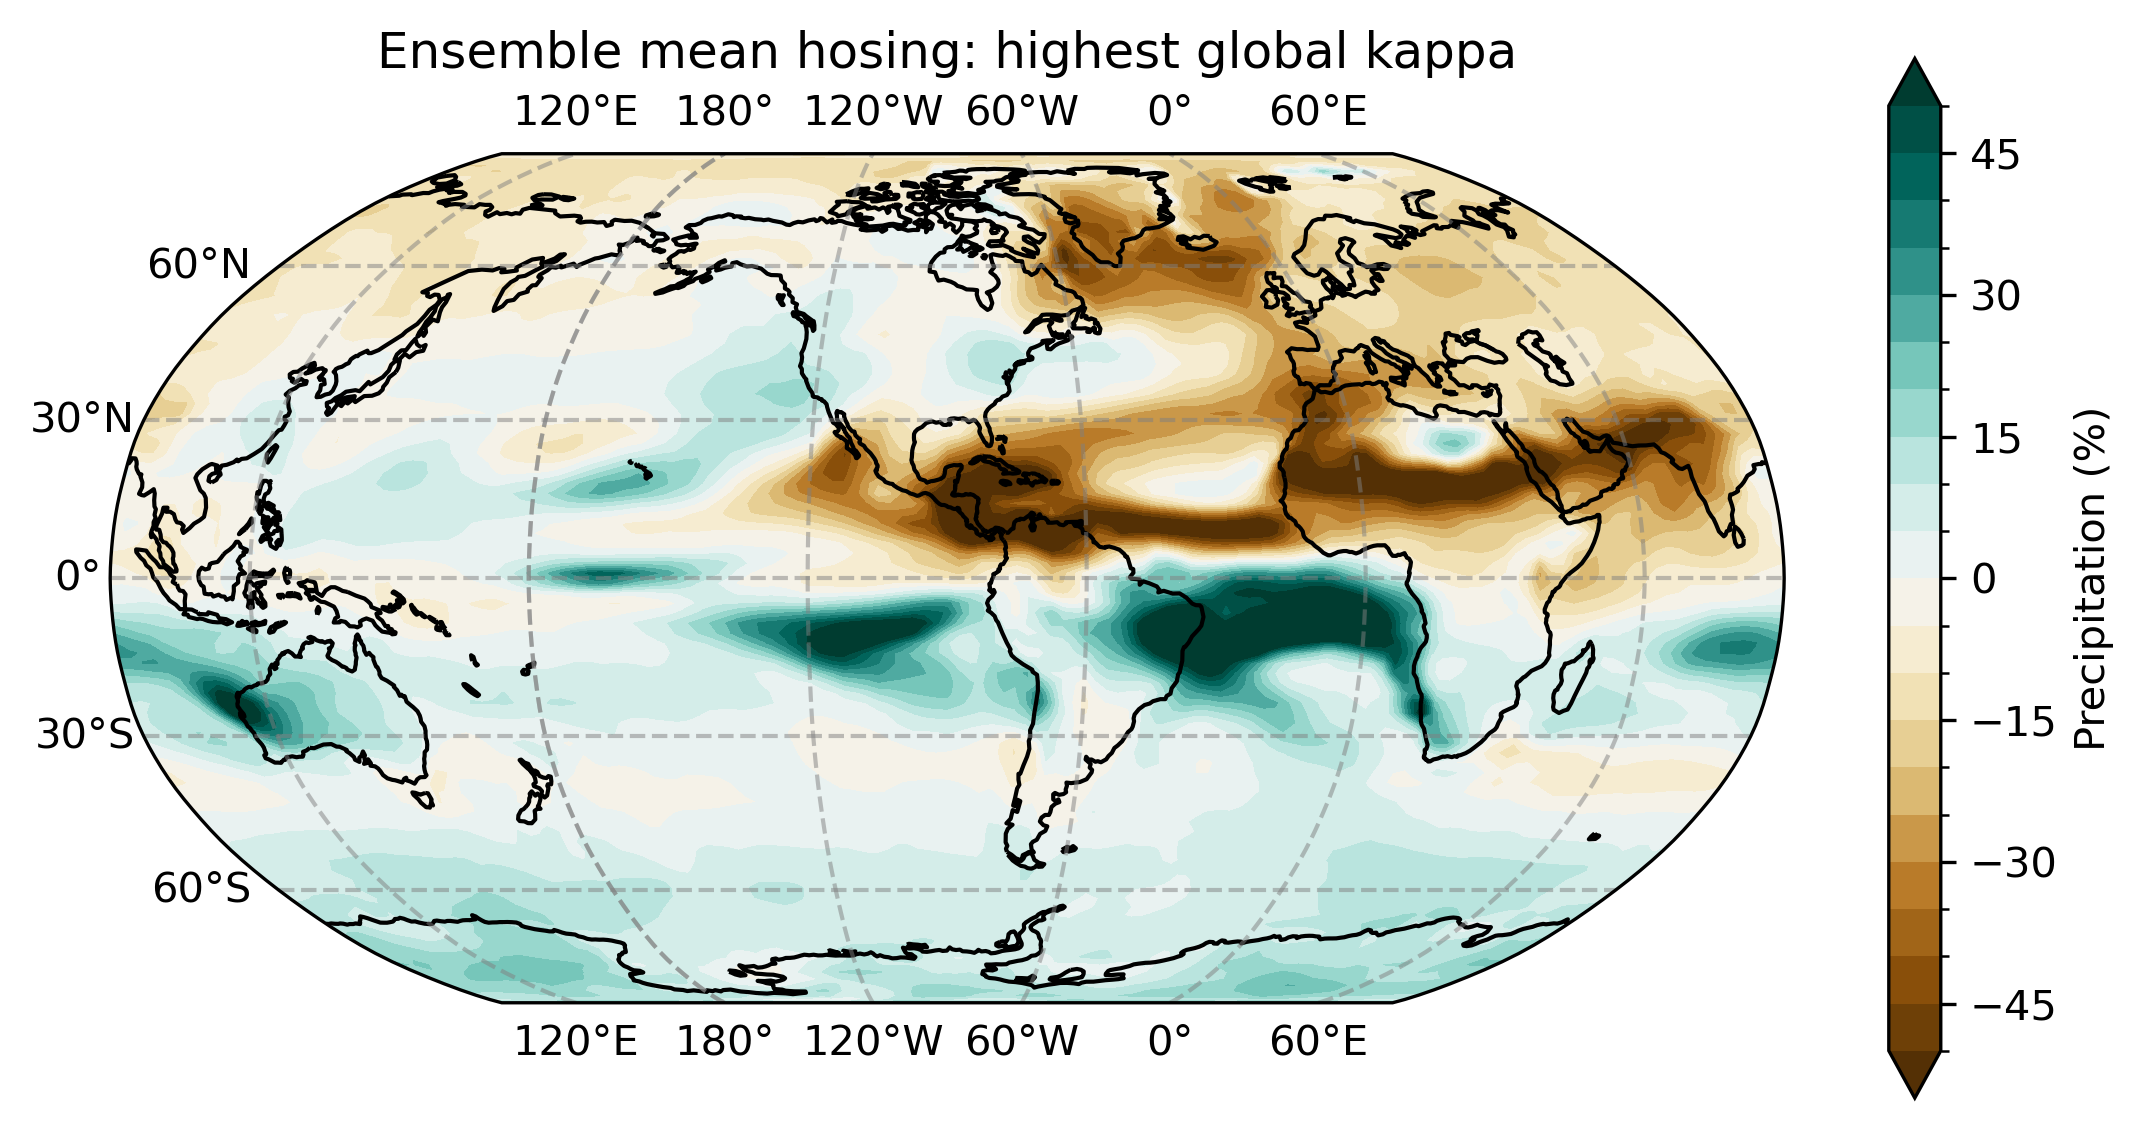

In [7]:
# colormap, levels, and label for the colorbar
cmap = 'BrBG'
lev = np.arange(-2.2,2.4,0.2);
label = "Precipitation change (mm/day)"

########################################################
# ENSEMBLE MEAN: HIGHEST KAPPA SIMULATIONS
########################################################
# ensemble mean of the simulations with the highest global kappa values
ensMeanHose = hose[bestIdx].mean(dim='model')
ensMeanCtrl = ctrl[bestIdx].mean(dim='model')

# hosing ensemble mean (highest kappa)
ax = plotWorldMap(ensMeanHose, cmap, lev, label)
ax.set_title('Ensemble mean hosing: Highest global kappa')

# control ensemble mean (highest kappa)
ax = plotWorldMap(ensMeanCtrl, cmocean.cm.rain, np.arange(0, 12, 1), label)
ax.set_title('Ensemble mean control: Highest global kappa')

# ensemble mean percent change
ensMeanPctChg = (ensMeanHose / ensMeanCtrl)*100

ax = plotWorldMap(ensMeanPctChg, cmap, np.arange(-50, 55, 5), "Precipitation (%)")
ax.set_title('Ensemble mean hosing: highest global kappa')

Text(0.5, 1.0, 'Simulations with highest global kappa (ensemble mean): Sign of the change')

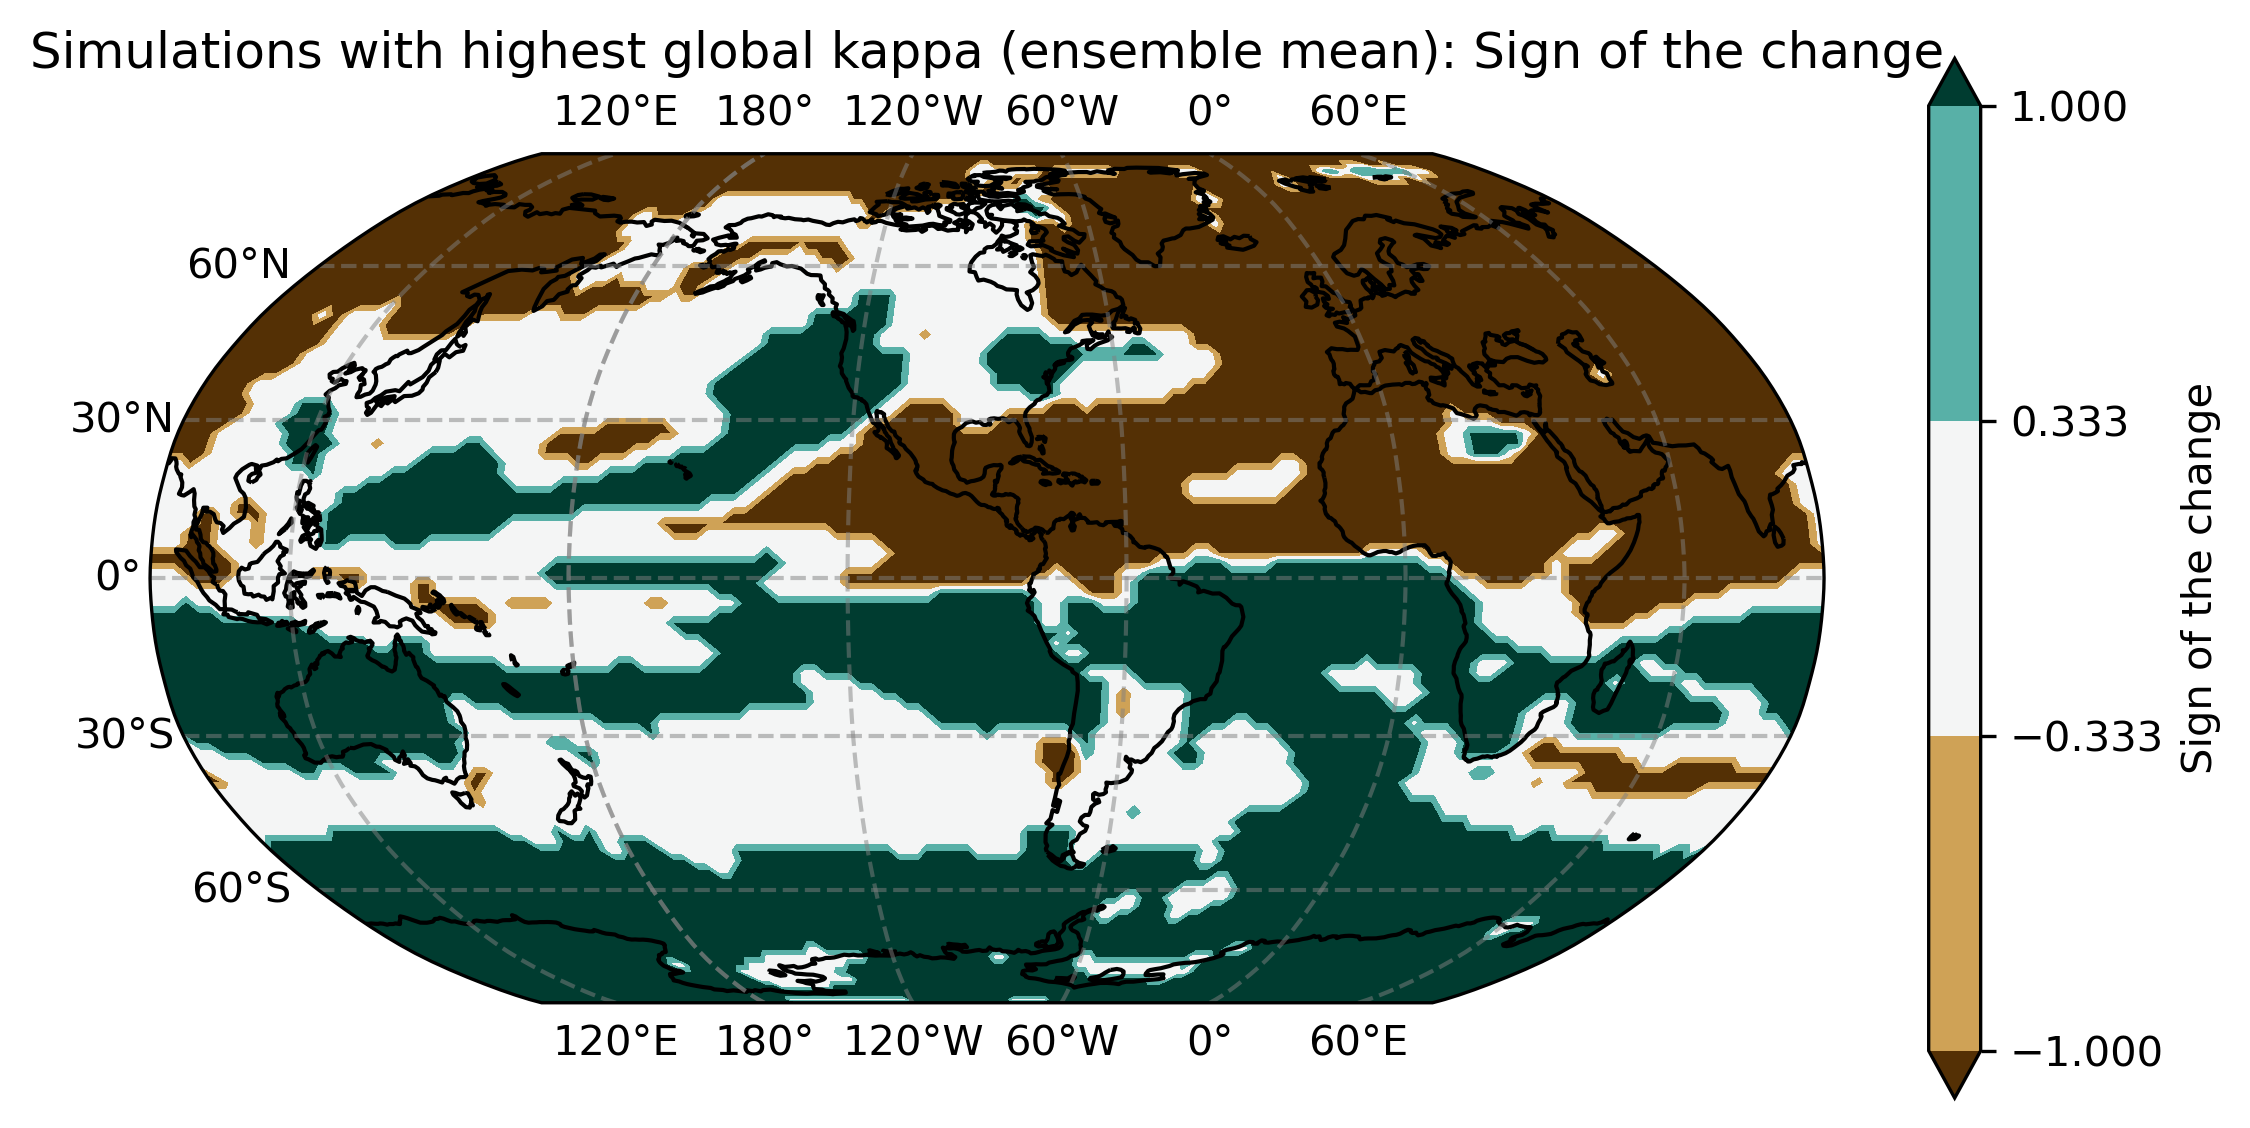

In [8]:
########################################################
# ENSEMBLE MEAN RAINFALL CHANGE: SIGN (+1, -1, 0)
########################################################
# rainfall threshold for calculating the sign of the change
rainThresh = 5

# sign of the rainfall change based on the wet/dry rainfall threshold
# -1 dry; +1 wet; 0 unchanged
ensMeanSign = ((ensMeanPctChg >= rainThresh)*1) - ((ensMeanPctChg <= -1*rainThresh)*1)

ax = plotWorldMap(ensMeanSign, cmap, np.arange(-1, 1.5, 2/3), "Sign of the change")
ax.set_title('Simulations with highest global kappa (ensemble mean): Sign of the change')

In [9]:
########################################################
# AGREEMENT WITH ENSEMBLE MEAN
########################################################
# sign of the rainfall change (all simulations)
simulationSign = ((pctChg >= rainThresh)*1) - ((pctChg <= -1*rainThresh)*1)

# sign for simulations with highest model-data agreement
bestSimulationSign = simulationSign[bestIdx]

# number of simulations that agree on the ensemble mean rainfall sign
numAgreement = sum((bestSimulationSign == ensMeanSign)*1)
numAgreement

<xarray.DataArray (lat: 96, lon: 145)>
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 175.0 177.5 180.0
    model    float32 4.0

Excluding record # 51 lat: -5.703, lon=11.2335
Excluding record # 92 lat: 6.656, lon=-52.083
Excluding record # 119 lat: 6.3928, lon=110.1542


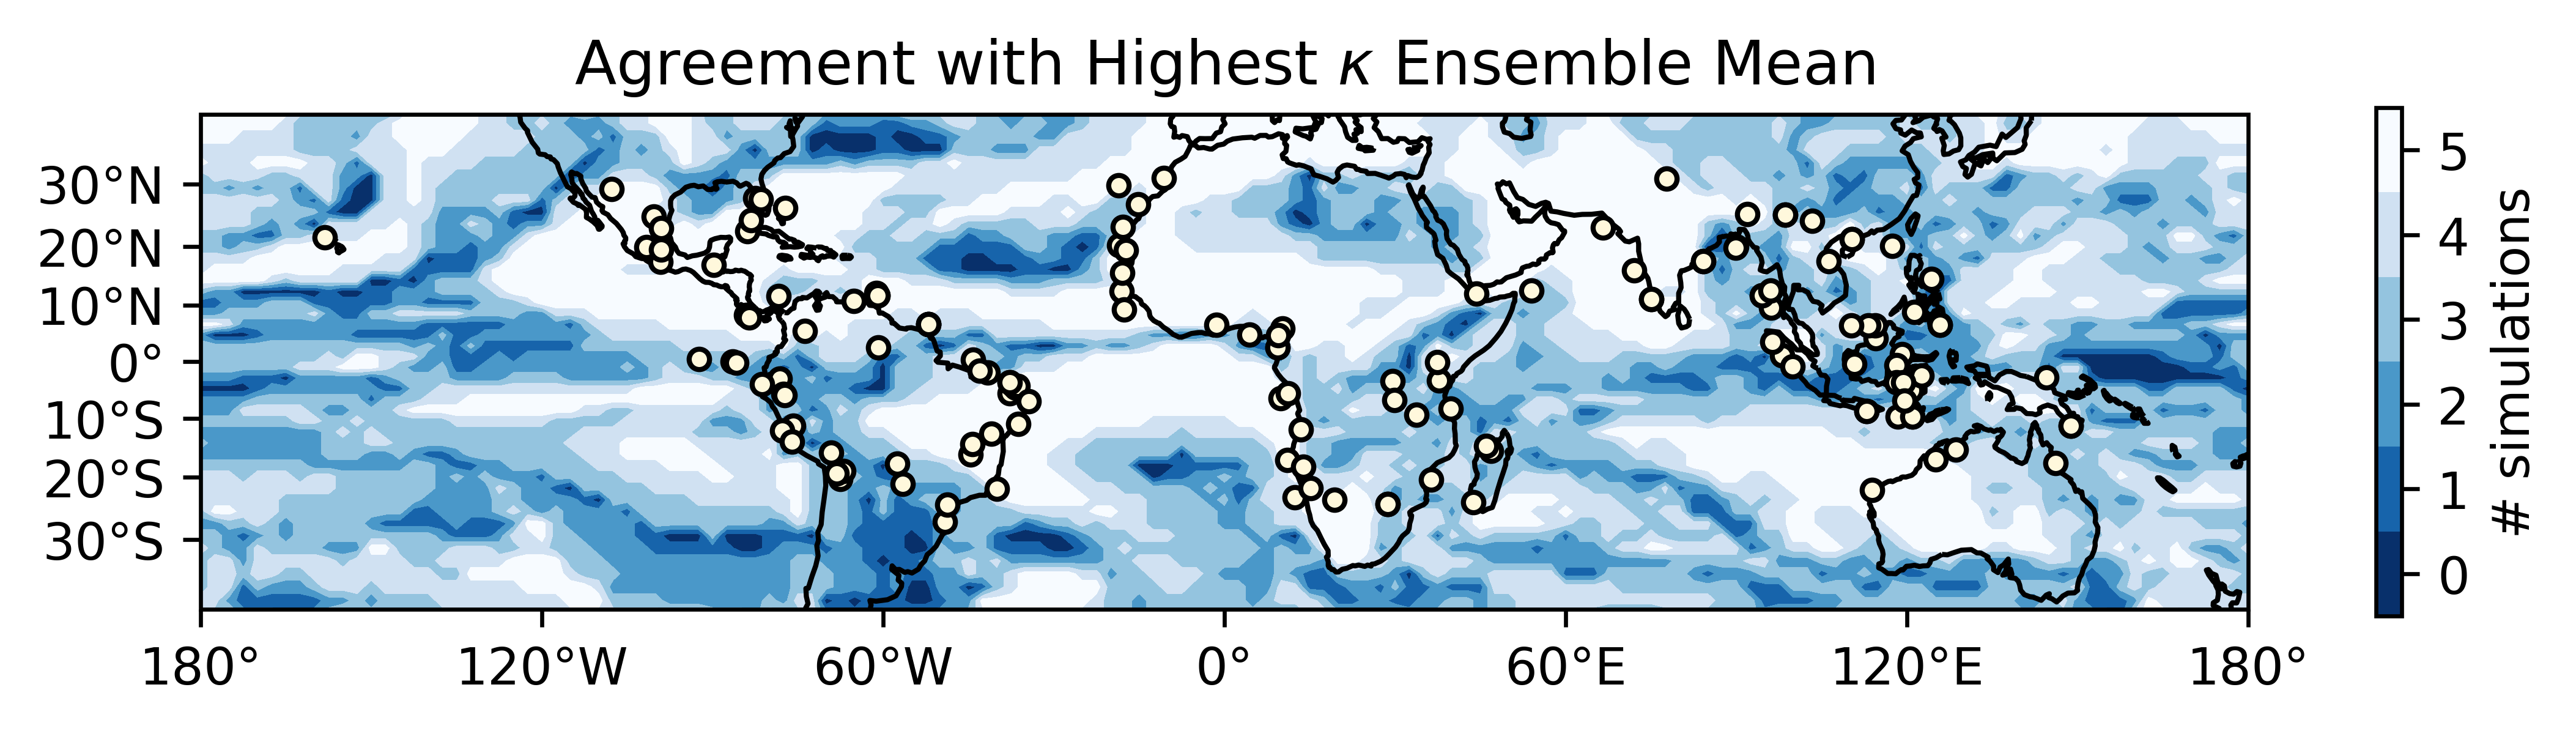

In [10]:
# define figure and axes, figure size, and resolution (300 dpi))
fig = plt.figure(figsize=(9, 4.5), dpi=600)
ax = plt.axes(projection = ccrs.Mercator())

# sign for simulations with highest model-data agreement
bestSimulationSign = simulationSign[bestIdx]

# number of simulations that agree on the ensemble mean rainfall sign
numAgreement = sum((bestSimulationSign == ensMeanSign)*1)

# filled contour map of mean temperature
cf = numAgreement.plot.contourf(
    x = 'lon',
    y = 'lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=np.arange(-.5, 6, 1),
    cmap='Blues_r', add_colorbar=True, cbar_kwargs = {"label":"# simulations", "location":"right", "shrink":0.4, "ticks":[0,1,2,3,4,5]})

ax.collections[-1].colorbar.minorticks_off()

# add proxy records if -1, 1, 0 interpretation
for p in np.arange(0, numRecords):
    if HS1_interp[p] == 0 :
        mkrColor = 'cornsilk' 
        addProxyRecord(proxyLon[p],proxyLat[p],mkrColor)
    elif HS1_interp[p] == 1:
        mkrColor = 'cornsilk'
        addProxyRecord(proxyLon[p],proxyLat[p],mkrColor)
    elif HS1_interp[p] == -1:
        mkrColor = 'cornsilk'
        addProxyRecord(proxyLon[p],proxyLat[p],mkrColor)
    else:
        # skip plotting records with a 'N/A' interpretation
        print('Excluding record # ' + str(proxyNum[p]) + ' lat: ' + str(proxyLat[p]) +', lon='+str(proxyLon[p]))
   
# add coastlines
ax.coastlines(
    resolution='110m')  #Currently can be one of “110m”, “50m”, and “10m”.

ax.set_extent([-180, 179, -40, 40])

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=False)
ax.set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-30, -20, -10, 0, 10, 20, 30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False, direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis='both')

gl.right_labels = None
gl.top_labels = False
gl.xlines = None
gl.ylines = None

# add title
ax.set_title('Agreement with Highest $\kappa$ Ensemble Mean')
ax.set_ylabel('')
ax.set_xlabel('')

fname = 'fig12_Hosing_ModelAgreement_BestKappa.pdf'
fig.savefig(fname, facecolor = 'white', transparent = False, bbox_inches ='tight')

5        CCSM3-TraCE-MWF
3     CCSM3-0.2Sv-GIN-LR
6       CESM1-iTraCE-MWF
7               IPSL-CM5
4               IPSL-CM4
10        CCSM4-0.1Sv-RB
Name: 0, dtype: object


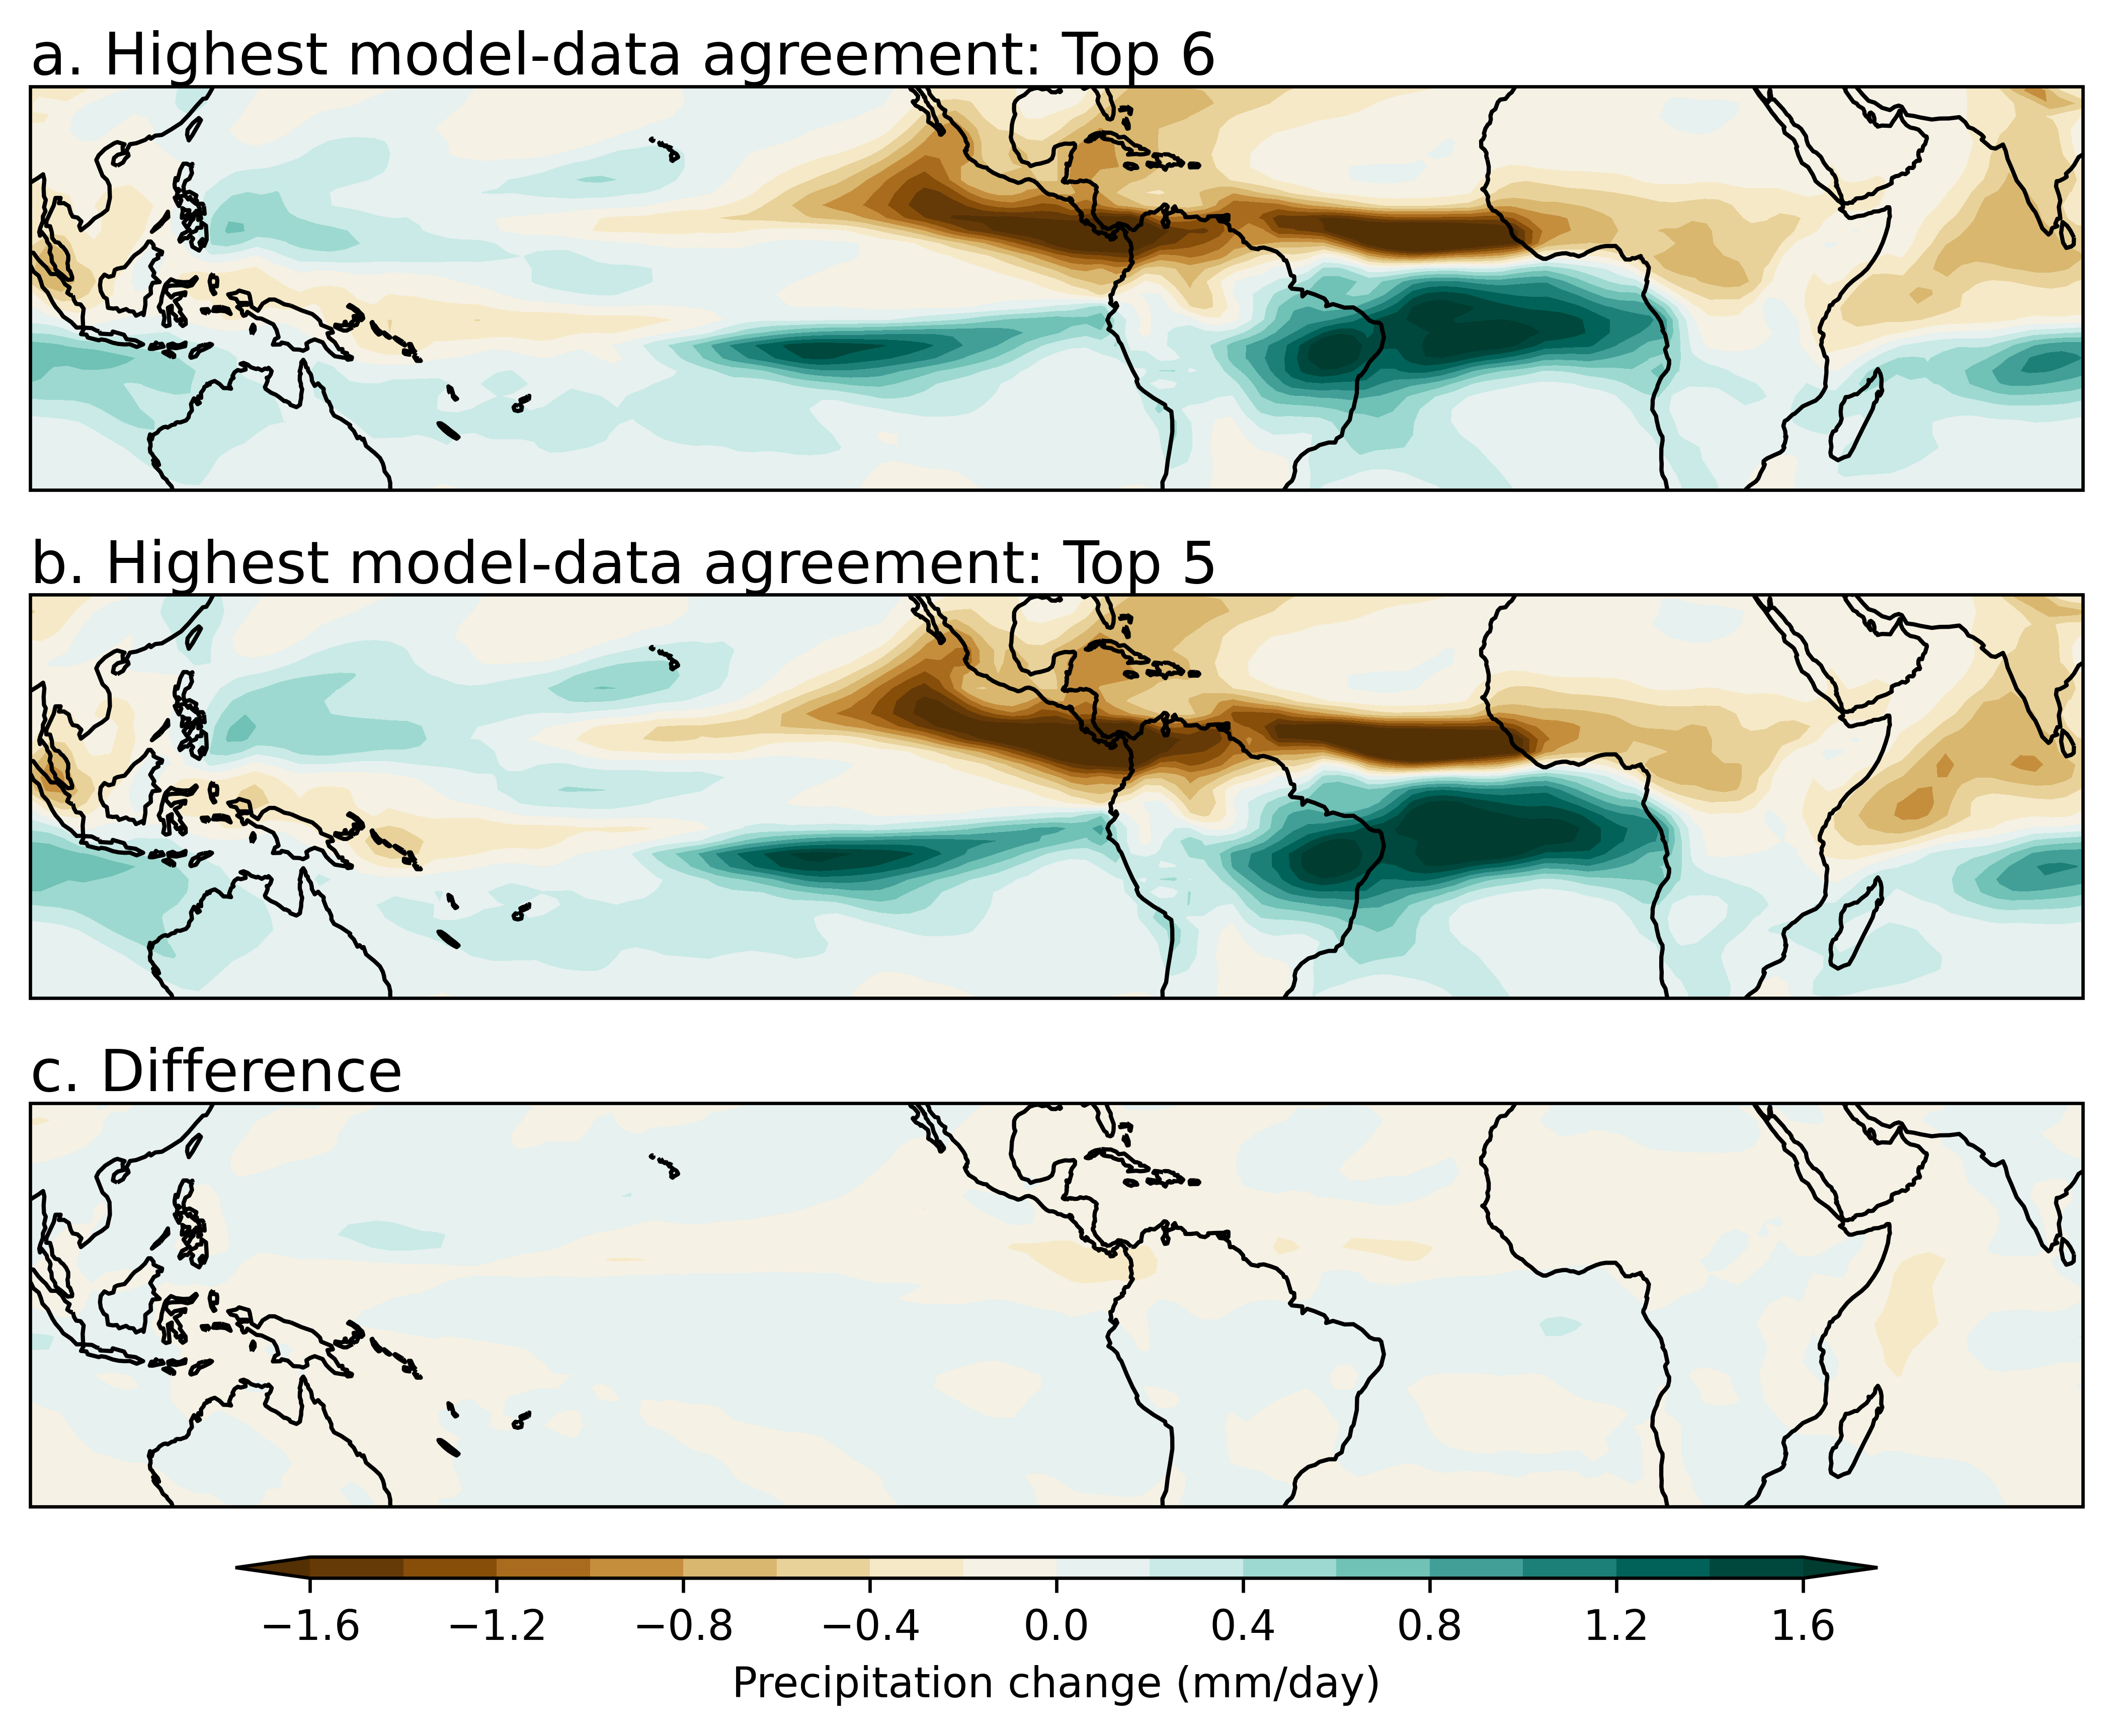

In [11]:
# compare the ensemble mean for the top 5 and top 6 simulations

# indices for the top 5 simulations based on the highest kappa value
bestIdx6 = [5, 3, 6, 7, 4, 10]
print(mdlNames[0][bestIdx6])

# ensemble mean for the top 5
ensMeanHose6 = hose[bestIdx6].mean(dim='model')

# ensemble mean for the top 6
ensMeanHose5 = hose[bestIdx].mean(dim='model')

lev = np.arange(-1.6,1.8, 0.2)

fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude = -90)},
                        figsize=(8.5, 7), dpi = 600)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()

cs=axs[0].contourf(ensMeanHose6.lon,ensMeanHose6.lat,ensMeanHose6,
                        transform = ccrs.PlateCarree(), cmap='BrBG',extend='both', levels = lev)
axs[0].set_title('a. Highest model-data agreement: Top 6', fontsize=14, pad=-1, loc = 'left')

cs=axs[1].contourf(ensMeanHose5.lon,ensMeanHose5.lat,ensMeanHose5,
                        transform = ccrs.PlateCarree(), cmap='BrBG',extend='both', levels = lev)
axs[1].set_title('b. Highest model-data agreement: Top 5', fontsize=14, pad=-1, loc = 'left')

cs=axs[2].contourf(ensMeanHose5.lon,ensMeanHose5.lat,ensMeanHose5 - ensMeanHose6,
                        transform = ccrs.PlateCarree(), cmap='BrBG',extend='both', levels = lev)
axs[2].set_title('c. Difference', fontsize=14, pad=-1, loc = 'left')

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.05, hspace=0.1)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.18, 0.18, 0.64, 0.01])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label='Precipitation change (mm/day)')


# Draw the coastines for each subplot
for i in range(0,3):
    axs[i].coastlines()
    axs[i].set_extent([0, 360, -30, 30], crs=ccrs.PlateCarree())

fname = 'precip_ens_mean_BestKappa_comparison.png'
fig.savefig(fname, facecolor = 'white', transparent = False, bbox_inches ='tight')